## seaborn

<div align="center">
   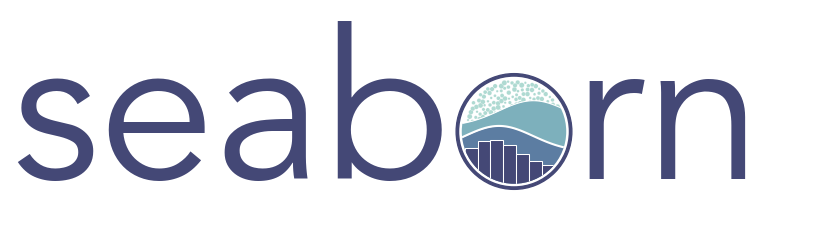
</div>

**seaborn** es una librería de visualización de datos para Python desarrollada sobre **matplotlib**. Ofrece una interfaz de alto nivel para la creación de gráficas. Además, está integrada con las estructuras de datos de **pandas**, lo que permite utilizar el nombre de los **DataFrames** y campos directamente como argumentos de las funciones de visualización.

Para instalar **seaborn** podemos ejecutar la siguiente linea en la terminal de **Anaconda**:
```
pip install seaborn
```

Si queremos la última versión podemos ejecutar:
```
pip install -U seaborn
```

Por lo general, al importar la librería **seaborn** se abrevia como **sns**.



|Función              | Plot                                                                                                                              |
|---------------------|-----------------------------------------------------------------------------------------------------------------------------------|
|**sns.barplot()**    | Crea un gráfico de barras con el promedio de los valores.                                                                         |
|**sns.countplot()**  | Crea un grafico de barras con el conteo de cada categoria. (_plt.bar()_)                                                          |
|**sns.histplot()**   | Crea un histograma. (_plt.hist()_)                                                                                                |
|**sns.scatterplot()**| Crea un scatterplot. (_plt.scatter()_)                                                                                            |
|**sns.jointplot()**  | Crea graficos de dispersión con histogramas.                                                                                      |
|**sns.kdeplot()**    | Crea graficos de densidad de probabilidad de la curva continua de los datos.                                                      |
|**sns.boxplot()**    | Crea graficos de caja. (_plt.boxplot()_)                                                                                          |
|**sns.violinplot()** | Crea graficos de violin. (_plt.violinplot()_)                                                                                     |
|**sns.heatmap()**    | Crea mapas de calor.                                                                                                              |
|**sns.FacetGrid()**  | Genera una matriz de graficas filtrando por las columnas y filas del **DataFrame** y aplicando una misma grafica a toda la matriz.|
|**sns.pairplot()**   | Crea una matriz de graficas, en la diagonal aparece el **histograma** y en los demás una gráfica de **dispersión**.               |



In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.0
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2


In [3]:
# Datasets de seaborn para prueba y estudiar
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
# Usaremos el DataFrame de CO2 Emissions para los ejemplos

df = pd.read_csv("../Data/co2_emissions.csv")

df.head(3)

,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel Consumption Comb (mpg),CO2 Emissions
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,Reg. Gasoline,11.6,8.3,10.1,28.0,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,Reg. Gasoline,11.0,8.3,9.8,29.0,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Prm. Gasoline,10.8,8.3,9.7,29.0,223


<Axes: ylabel='CO2 Emissions'>

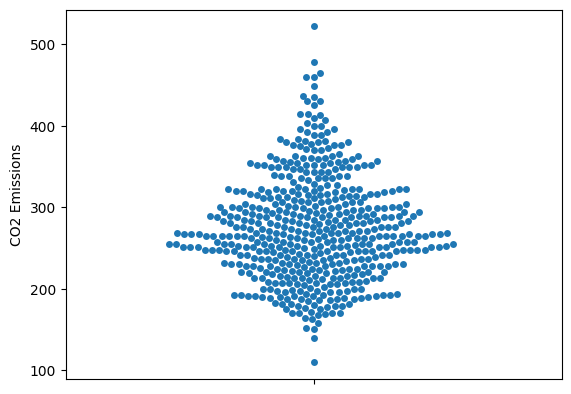

In [6]:
# Esquema general: le pasamos el dataframe completo y luego los nombres de las columnas
# sns.scatterplot(df, x='Age', y='Fare', hue='', size=')
# sns.scatterplot(df, x='Age', y='Fare', hue='', size=')
# sns.histplot(df, x='CO2 Emissions')


# OPCIÓN 1: Pasarle la columna directamente (cuando solo es una es lo más sencillo)
# sns.histplot(df['CO2 Emissions'])
# sns.boxplot(df['CO2 Emissions'])
# sns.violinplot(df['CO2 Emissions'])
# sns.stripplot(df['CO2 Emissions'].sample(500))
# sns.stripplot(df['CO2 Emissions'])
# IMPORTANTE: si son muchos datos mejor usar una muestra con .sample()
sns.swarmplot(df['CO2 Emissions'].sample(500))

### sns.barplot()

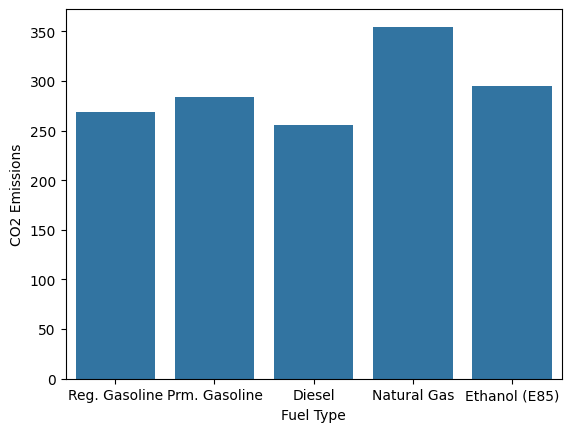

In [7]:
# x = varible categorica
# y = variable numérica

sns.barplot(x = "Fuel Type", y = "CO2 Emissions", data = df, errorbar=None)
plt.show()

In [8]:
# La altura de cada barra es la media de cada categoria

df.groupby(by = "Fuel Type", as_index = False).agg({"CO2 Emissions" : "mean"})

,Fuel Type,CO2 Emissions
0,Diesel,255.887295
1,Ethanol (E85),294.697525
2,Natural Gas,354.717949
3,Prm. Gasoline,283.846329
4,Reg. Gasoline,268.647736


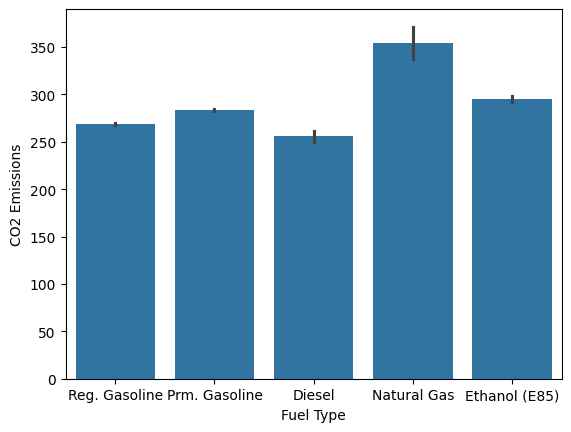

In [9]:
# Otra forma de usar los parámetros

sns.barplot(x = df["Fuel Type"], y = df["CO2 Emissions"])
plt.show()

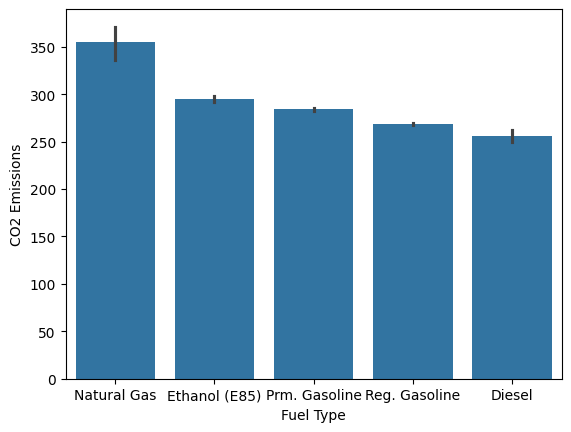

In [10]:
# Con "order" podemos elegir el orden en el que aparecen

sns.barplot(x = "Fuel Type", y = "CO2 Emissions", data = df,
            order = ["Natural Gas", "Ethanol (E85)", "Prm. Gasoline", "Reg. Gasoline", "Diesel"]) 
plt.show()

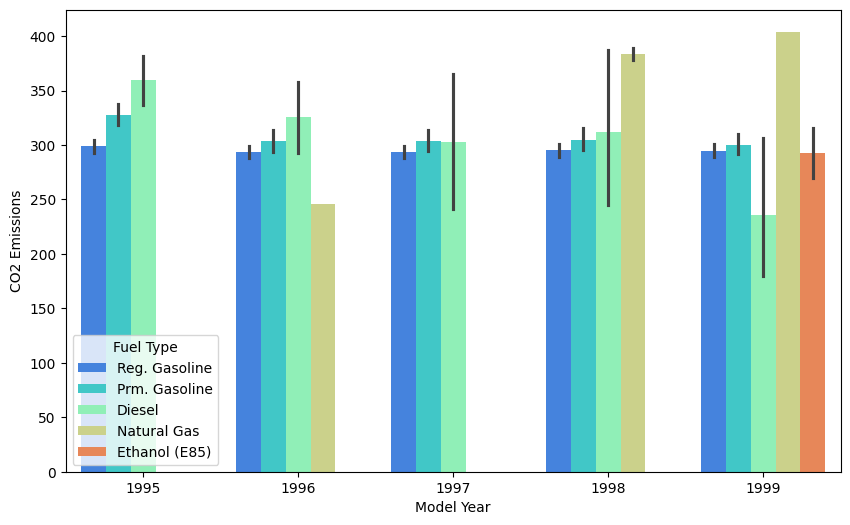

In [11]:
plt.figure(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")

plt.show()

In [12]:
df[df["Model Year"] < 2000].groupby(["Fuel Type", "Model Year"], as_index = False)["CO2 Emissions"].mean()

,Fuel Type,Model Year,CO2 Emissions
0,Diesel,1995,359.945946
1,Diesel,1996,325.526316
2,Diesel,1997,302.357143
3,Diesel,1998,312.083333
4,Diesel,1999,235.500000
5,Ethanol (E85),1999,292.800000
6,Natural Gas,1996,246.000000
7,Natural Gas,1998,383.500000
8,Natural Gas,1999,404.000000
9,Prm. Gasoline,1995,327.362162


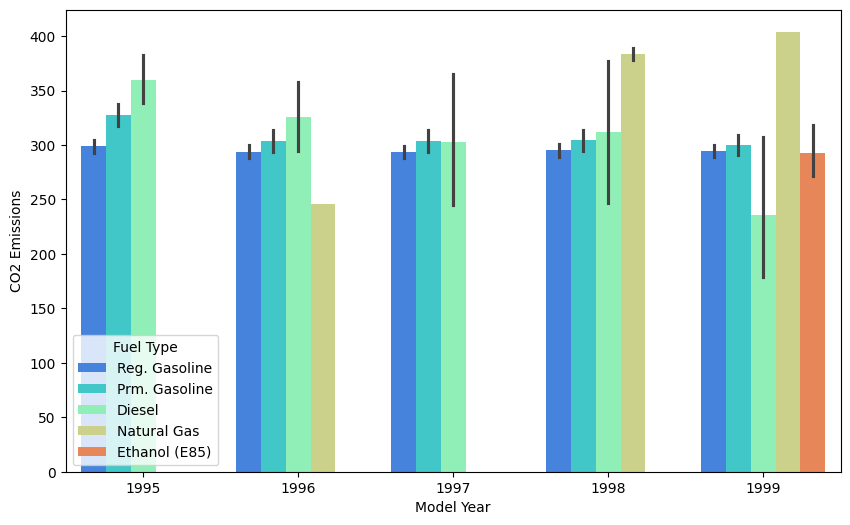

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")
plt.show()

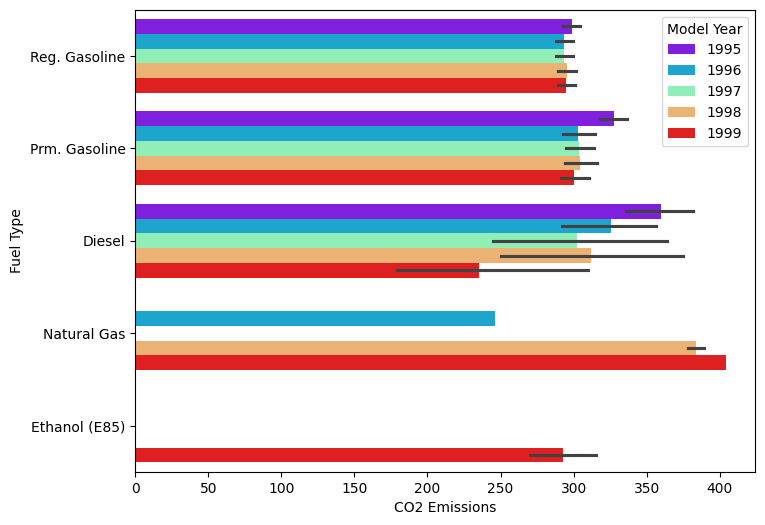

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "CO2 Emissions", y = "Fuel Type", hue = "Model Year", data = df[df["Model Year"] < 2000], palette = "rainbow")
plt.show()

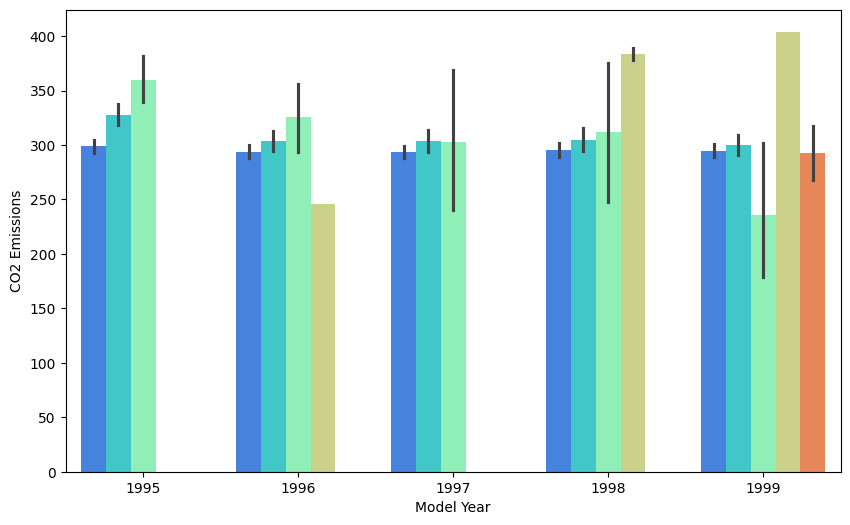

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")

ax.legend_.remove()
plt.show()

### sns.countplot()

**sns.countplot()** es la función **plt.bar()** de **matplotlib**.

In [16]:
df["Fuel Type"].value_counts()

Fuel Type
Reg. Gasoline    14861
Prm. Gasoline    10568
Ethanol (E85)     1091
Diesel             488
Natural Gas         39
Name: count, dtype: int64

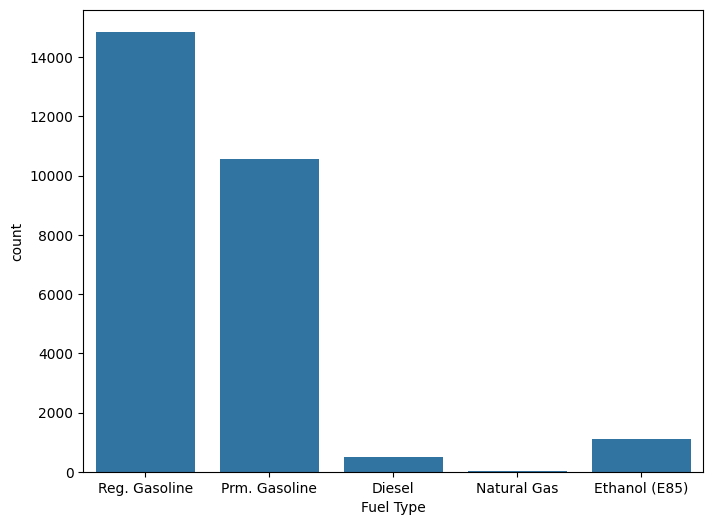

In [17]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["Fuel Type"])

plt.show() 

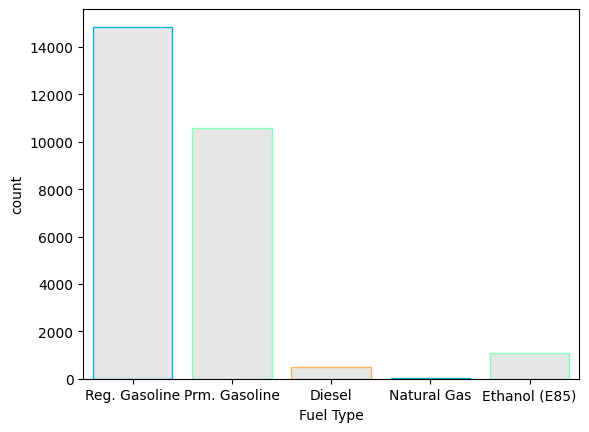

In [18]:
# El número dentro del color_palette se utiliza para elegir el número de colores
sns.countplot(x         = df["Fuel Type"],
              facecolor = (0.9, 0.9, 0.9),
              linewidth = 1,
              edgecolor = sns.color_palette("rainbow", 3))
plt.show()

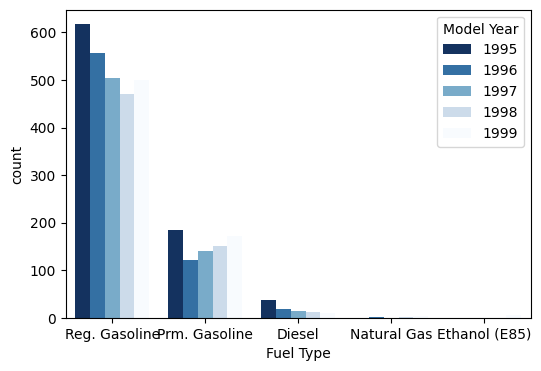

In [19]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "Fuel Type", hue = "Model Year", data = df[df["Model Year"] < 2000], palette = "Blues_r")
plt.show()

### Histogramas

**sns.histplot()**

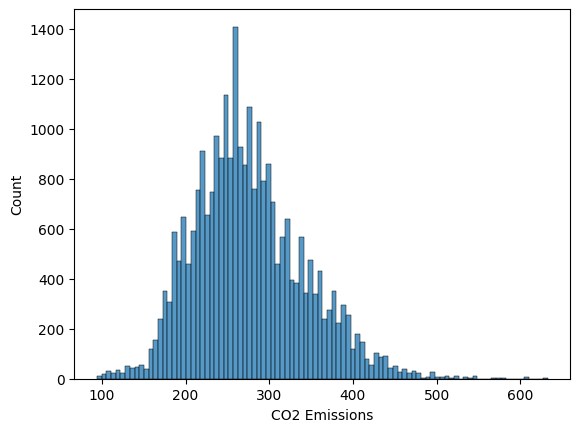

In [20]:
sns.histplot(df["CO2 Emissions"])
plt.show()

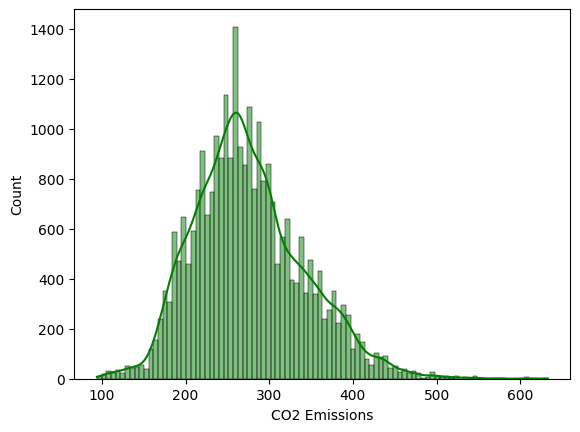

In [21]:
sns.histplot(df["CO2 Emissions"], color = "green", kde = True)
plt.show()

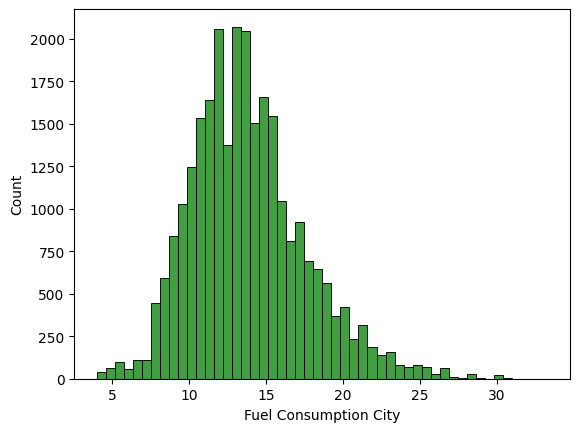

In [22]:
sns.histplot(df["Fuel Consumption City"], color = "green", bins = 50)
plt.show()

### Scatter Plots (graficos de dispersión) 
**sns.scatterplot()**

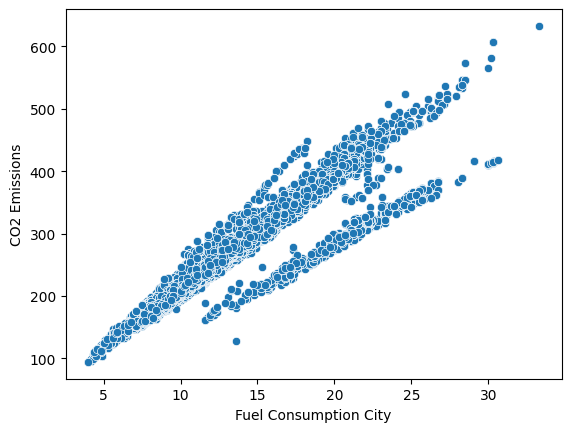

In [23]:
sns.scatterplot(x = df["Fuel Consumption City"], y = df["CO2 Emissions"])
plt.show()

### Joint Plots
**sns.jointplot()**

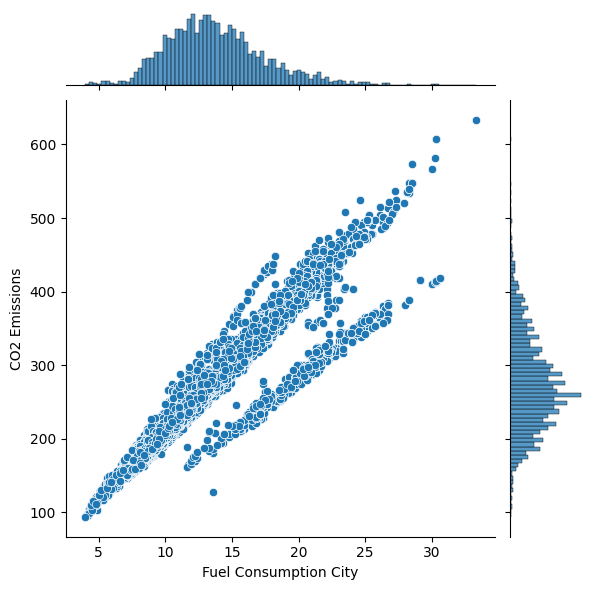

In [24]:
sns.jointplot(x = df["Fuel Consumption City"], y = df["CO2 Emissions"])
plt.show()

### sns.kdeplot()

**Kernel Density Estimate (KDE)** nos permite estimar la función de densidad de probabilidad de la curva continua (o no paramétrica) de nuestro conjunto de datos en una o más dimensiones.

En otras palabras, es un método para la visualización de las distribución de los **patrones** u **observaciones** del dataset, es análogo a un histograma.

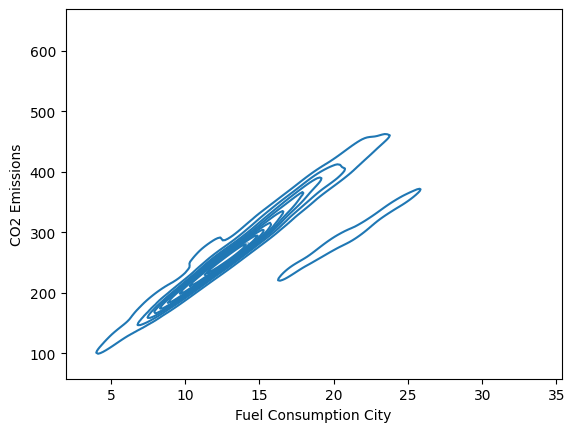

In [25]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"])
plt.show()

In [ ]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"],
            shade = True, 
            n_levels = 6)
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_27664\2460664916.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df["Fuel Consumption City"],


In [ ]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"],
            shade = True, 
            n_levels = 3)
plt.show()

### sns.boxplot() y sns.violinplot()

In [ ]:
sns.boxplot(x = df["Fuel Type"],
            y = df["CO2 Emissions"])

plt.show()

In [ ]:
sns.violinplot(x = df["Fuel Type"],
            y = df["CO2 Emissions"])

plt.show()

In [ ]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "Fuel Type",
            y = "CO2 Emissions",
            hue = "Model Year",
            data = df[df["Model Year"] < 2000],
            palette = "Blues")
plt.show()

### sns.heatmap()

Mapas de calor.

In [ ]:
df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr()

In [ ]:
sns.heatmap(data = df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr())
plt.show()

In [ ]:
sns.heatmap(data = df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [ ]:
sns.heatmap(data = df._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [ ]:
################################################################################################################################